In [89]:
import numpy as np

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, precision_score, average_precision_score, recall_score
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score, roc_curve

import tensorflow as tf
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling1D, MaxPooling2D, LeakyReLU
from keras.initializers import RandomNormal
import keras.optimizers as opt
from keras.callbacks import TensorBoard
from keras.utils import plot_model
from keras.regularizers import l2

In [2]:
data = np.load('../data/data.npy')
meta = np.load('../data/meta.npy')
print(f'data = {data.shape}')
print(f'meta = {meta.shape}')

data = (1845, 21, 77)
meta = (1845, 3)


In [4]:
X = data[:,:,:,np.newaxis]
Y = meta[:,2][:,np.newaxis].astype(int)

In [5]:
shape = X.shape
std = StandardScaler().fit(X.reshape(-1,1))
X = std.transform(X.reshape(-1,1)).reshape(shape)

In [6]:
X,Y = shuffle(X,Y)

In [13]:
x_train, x_test,  y_train, y_test  = train_test_split(X, Y, test_size = 0.2, random_state = 31)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.25, random_state = 31)

In [14]:
print(f"train: x={x_train.shape} y={y_train.shape}")
print(f"valid: x={x_valid.shape} y={y_valid.shape}")
print(f"test : x={x_test.shape}  y={y_test.shape}")

train: x=(1107, 21, 77, 1) y=(1107, 1)
valid: x=(369, 21, 77, 1) y=(369, 1)
test : x=(369, 21, 77, 1)  y=(369, 1)


In [15]:
cnn_input = X.shape[1:]
cnn_output = Y.shape[1]
batch_size = 32

print(f"cnn_input  = {cnn_input}")
print(f"cnn_output = {cnn_output}")
print(f"batch_size = {batch_size}")

cnn_input  = (21, 77, 1)
cnn_output = 1
batch_size = 32


In [74]:
model = Sequential()

model.add(Conv2D(16, (7,7), activation = 'tanh', name = 'conv1', input_shape = cnn_input, 
                 kernel_regularizer=l2(0.005)))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), name='maxpool1'))

model.add(Conv2D(32, (5,5), activation='tanh', name='conv2'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1), name='maxpool2'))

model.add(Conv2D(64, (3,3), activation='tanh', name='conv3'))
model.add(MaxPooling2D(pool_size=(2,2), name='maxpool3'))

model.add(Flatten(name='flat4'))
#model.add(Dropout(0.5, name='drop4'))
model.add(Dense(1024, activation='tanh', name='dense4'))

model.add(Dense(cnn_output, activation='sigmoid', name='softmax'))

In [75]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1 (Conv2D)               (None, 15, 71, 16)        800       
_________________________________________________________________
maxpool1 (MaxPooling2D)      (None, 14, 70, 16)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 10, 66, 32)        12832     
_________________________________________________________________
maxpool2 (MaxPooling2D)      (None, 9, 65, 32)         0         
_________________________________________________________________
conv3 (Conv2D)               (None, 7, 63, 64)         18496     
_________________________________________________________________
maxpool3 (MaxPooling2D)      (None, 3, 31, 64)         0         
_________________________________________________________________
flat4 (Flatten)              (None, 5952)              0         
__________

In [76]:
optim = opt.SGD(lr = 0.001, decay = 1e-6, momentum = 0.5, nesterov=True)
model.compile(loss='binary_crossentropy', optimizer=optim, metrics=['accuracy'])

In [77]:
log = model.fit(x_train, y_train, batch_size = batch_size, epochs = 300, 
          verbose = 2, validation_data=(x_valid, y_valid))

Train on 1107 samples, validate on 369 samples
Epoch 1/300
 - 1s - loss: 0.6607 - acc: 0.6477 - val_loss: 0.6048 - val_acc: 0.7290
Epoch 2/300
 - 0s - loss: 0.6317 - acc: 0.6847 - val_loss: 0.5906 - val_acc: 0.7290
Epoch 3/300
 - 0s - loss: 0.6162 - acc: 0.6847 - val_loss: 0.5781 - val_acc: 0.7290
Epoch 4/300
 - 0s - loss: 0.6037 - acc: 0.6874 - val_loss: 0.5652 - val_acc: 0.7290
Epoch 5/300
 - 0s - loss: 0.5924 - acc: 0.6883 - val_loss: 0.5591 - val_acc: 0.7507
Epoch 6/300
 - 0s - loss: 0.5794 - acc: 0.6983 - val_loss: 0.5454 - val_acc: 0.7561
Epoch 7/300
 - 0s - loss: 0.5637 - acc: 0.7136 - val_loss: 0.5345 - val_acc: 0.7615
Epoch 8/300
 - 0s - loss: 0.5528 - acc: 0.7236 - val_loss: 0.5154 - val_acc: 0.7642
Epoch 9/300
 - 0s - loss: 0.5359 - acc: 0.7362 - val_loss: 0.5025 - val_acc: 0.7696
Epoch 10/300
 - 0s - loss: 0.5197 - acc: 0.7543 - val_loss: 0.4850 - val_acc: 0.7696
Epoch 11/300
 - 0s - loss: 0.5061 - acc: 0.7669 - val_loss: 0.4711 - val_acc: 0.7913
Epoch 12/300
 - 0s - loss: 

Epoch 97/300
 - 0s - loss: 0.1554 - acc: 0.9584 - val_loss: 0.2059 - val_acc: 0.9268
Epoch 98/300
 - 0s - loss: 0.1515 - acc: 0.9539 - val_loss: 0.1942 - val_acc: 0.9350
Epoch 99/300
 - 0s - loss: 0.1554 - acc: 0.9494 - val_loss: 0.1952 - val_acc: 0.9404
Epoch 100/300
 - 0s - loss: 0.1507 - acc: 0.9575 - val_loss: 0.1938 - val_acc: 0.9404
Epoch 101/300
 - 0s - loss: 0.1416 - acc: 0.9612 - val_loss: 0.2018 - val_acc: 0.9404
Epoch 102/300
 - 0s - loss: 0.1442 - acc: 0.9593 - val_loss: 0.2040 - val_acc: 0.9295
Epoch 103/300
 - 0s - loss: 0.1460 - acc: 0.9584 - val_loss: 0.1899 - val_acc: 0.9377
Epoch 104/300
 - 0s - loss: 0.1443 - acc: 0.9584 - val_loss: 0.1862 - val_acc: 0.9377
Epoch 105/300
 - 0s - loss: 0.1421 - acc: 0.9630 - val_loss: 0.1884 - val_acc: 0.9431
Epoch 106/300
 - 0s - loss: 0.1395 - acc: 0.9639 - val_loss: 0.1957 - val_acc: 0.9377
Epoch 107/300
 - 0s - loss: 0.1372 - acc: 0.9575 - val_loss: 0.1952 - val_acc: 0.9377
Epoch 108/300
 - 0s - loss: 0.1362 - acc: 0.9666 - val_lo

Epoch 193/300
 - 0s - loss: 0.0680 - acc: 0.9928 - val_loss: 0.1869 - val_acc: 0.9377
Epoch 194/300
 - 0s - loss: 0.0663 - acc: 0.9883 - val_loss: 0.1796 - val_acc: 0.9458
Epoch 195/300
 - 0s - loss: 0.0701 - acc: 0.9883 - val_loss: 0.1772 - val_acc: 0.9512
Epoch 196/300
 - 0s - loss: 0.0649 - acc: 0.9955 - val_loss: 0.1877 - val_acc: 0.9404
Epoch 197/300
 - 0s - loss: 0.0660 - acc: 0.9901 - val_loss: 0.1775 - val_acc: 0.9458
Epoch 198/300
 - 0s - loss: 0.0660 - acc: 0.9928 - val_loss: 0.1799 - val_acc: 0.9485
Epoch 199/300
 - 0s - loss: 0.0658 - acc: 0.9928 - val_loss: 0.1841 - val_acc: 0.9485
Epoch 200/300
 - 0s - loss: 0.0657 - acc: 0.9919 - val_loss: 0.1837 - val_acc: 0.9512
Epoch 201/300
 - 0s - loss: 0.0646 - acc: 0.9910 - val_loss: 0.1830 - val_acc: 0.9485
Epoch 202/300
 - 0s - loss: 0.0627 - acc: 0.9919 - val_loss: 0.1905 - val_acc: 0.9458
Epoch 203/300
 - 0s - loss: 0.0620 - acc: 0.9964 - val_loss: 0.1941 - val_acc: 0.9458
Epoch 204/300
 - 0s - loss: 0.0633 - acc: 0.9937 - val

Epoch 289/300
 - 0s - loss: 0.0420 - acc: 0.9991 - val_loss: 0.2039 - val_acc: 0.9404
Epoch 290/300
 - 0s - loss: 0.0427 - acc: 0.9982 - val_loss: 0.2020 - val_acc: 0.9566
Epoch 291/300
 - 0s - loss: 0.0427 - acc: 0.9991 - val_loss: 0.2086 - val_acc: 0.9431
Epoch 292/300
 - 0s - loss: 0.0428 - acc: 0.9991 - val_loss: 0.2016 - val_acc: 0.9566
Epoch 293/300
 - 0s - loss: 0.0420 - acc: 0.9982 - val_loss: 0.2100 - val_acc: 0.9404
Epoch 294/300
 - 0s - loss: 0.0417 - acc: 0.9991 - val_loss: 0.1992 - val_acc: 0.9512
Epoch 295/300
 - 0s - loss: 0.0418 - acc: 0.9991 - val_loss: 0.2045 - val_acc: 0.9485
Epoch 296/300
 - 0s - loss: 0.0415 - acc: 0.9991 - val_loss: 0.2000 - val_acc: 0.9458
Epoch 297/300
 - 0s - loss: 0.0422 - acc: 0.9991 - val_loss: 0.1999 - val_acc: 0.9431
Epoch 298/300
 - 0s - loss: 0.0417 - acc: 0.9991 - val_loss: 0.1991 - val_acc: 0.9458
Epoch 299/300
 - 0s - loss: 0.0419 - acc: 0.9982 - val_loss: 0.2089 - val_acc: 0.9593
Epoch 300/300
 - 0s - loss: 0.0413 - acc: 0.9991 - val

In [78]:
result = model.evaluate(x_test, y_test)
print('Testing:')
print('\n'.join('{} = {}'.format(*k) for k in zip(model.metrics_names, result)))

369/369 [==============================] - 0s 81us/step
Testing:
loss = 0.21780787735450557
acc = 0.9457994581561101


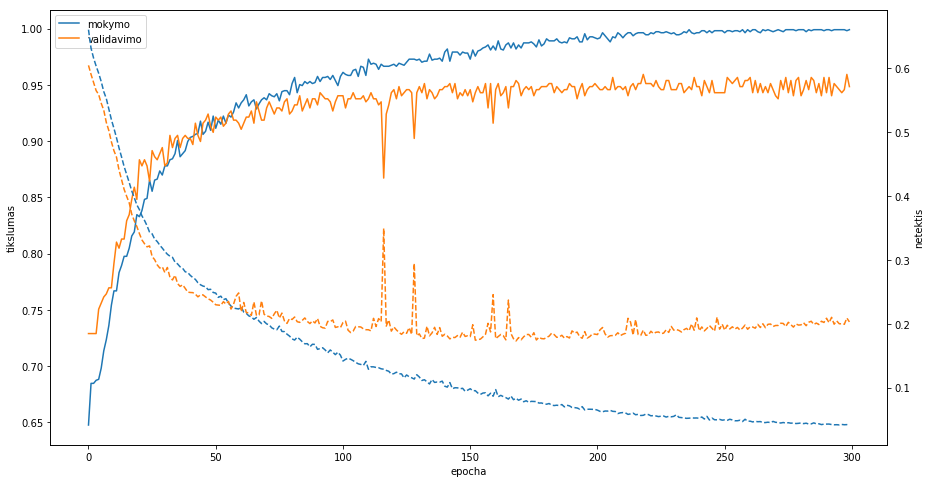

In [79]:
plt.rcParams['figure.figsize'] = (15, 8)

plt.plot(log.history['acc'], label = 'mokymo')
plt.plot(log.history['val_acc'], label = 'validavimo')
plt.ylabel('tikslumas')
plt.xlabel('epocha')
plt.legend() #['mokymo', 'testavimo'])

ax2 = plt.twinx()
ax2.plot(log.history['loss'], '--', label = 'mokymo')
ax2.plot(log.history['val_loss'], '--', label = 'validavimo')
ax2.set_ylabel('netektis')
#plt.title('model accuracy')
plt.show()

#joblib.dump(model, os.path.join(OUTPUT_FOLDER,f'nn_{h}_veg.pkl'))

In [80]:
confusion_matrix(y_test, model.predict_classes(x_test))

array([[241,   6],
       [ 14, 108]])

In [81]:
f1_score(y_test, model.predict_classes(x_test))

0.9152542372881356

In [82]:
roc_auc_score(y_test, model.predict(x_test))

0.9803544169376783

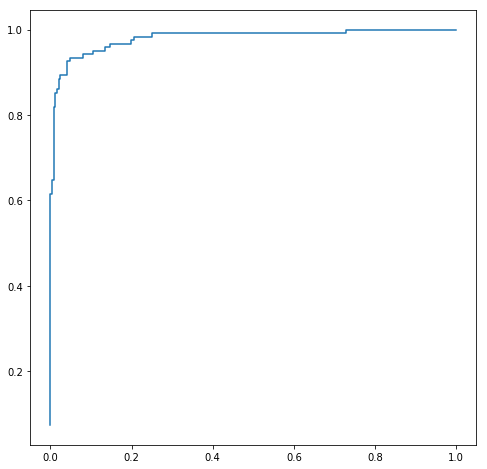

In [85]:
plt.rcParams['figure.figsize'] = (8, 8)
roc = roc_curve(y_test, model.predict(x_test))
plt.plot(roc[0],roc[1])
plt.show()

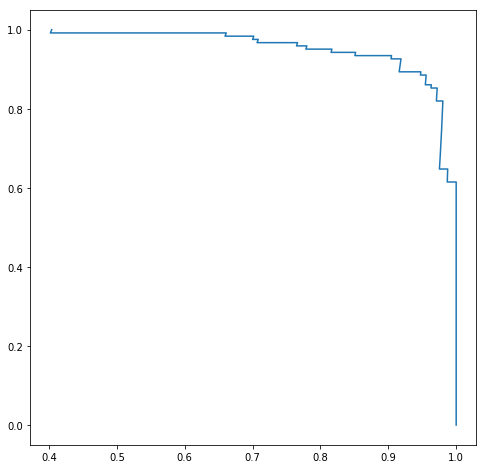

In [86]:
plt.rcParams['figure.figsize'] = (8, 8)
prc = precision_recall_curve(y_test, model.predict(x_test))
plt.plot(prc[0],prc[1])
plt.show()

In [90]:
average_precision_score(y_test, model.predict(x_test))

0.9706534586842358

In [93]:
precision_score(y_test, model.predict_classes(x_test))

0.9473684210526315

In [94]:
recall_score(y_test, model.predict_classes(x_test))

0.8852459016393442